Лабораторна робота №5

Баш Анастасія
МІТ-31


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Завдання


Завантажте набір даних по медичному страхуванню за посиланням

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    

За рахунок зміни гіперпараметрів нейронної мережі спробуйте досягнути найменшого значення функції втрат (mae).

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(254, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1) # Один нейрон, оскільки це задача регресії
])


optimizer = tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9))

# L2 регуляризації
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Компіляція
model.compile(loss=tf.keras.losses.mae, optimizer=optimizer, metrics=['mae'])

# Навчання
history = model.fit(X_train, y_train, epochs=700, batch_size=64, validation_split=0.2)

# оцінка моделі
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MAE)", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE)", test_loss)

Epoch 1/700
14/14 [==============================] - 0s 13ms/step - loss: 13515.3740 - mae: 13515.3555 - val_loss: 12646.4531 - val_mae: 12646.4346
Epoch 2/700
14/14 [==============================] - 0s 3ms/step - loss: 13497.8174 - mae: 13497.7969 - val_loss: 12611.5977 - val_mae: 12611.5781
Epoch 3/700
14/14 [==============================] - 0s 2ms/step - loss: 13428.8965 - mae: 13428.8770 - val_loss: 12479.1689 - val_mae: 12479.1475
Epoch 4/700
14/14 [==============================] - 0s 2ms/step - loss: 13181.5312 - mae: 13181.5098 - val_loss: 12033.1836 - val_mae: 12033.1611
Epoch 5/700
14/14 [==============================] - 0s 2ms/step - loss: 12434.1787 - mae: 12434.1562 - val_loss: 10886.7227 - val_mae: 10886.6982
Epoch 6/700
14/14 [==============================] - 0s 2ms/step - loss: 11031.7500 - mae: 11031.7256 - val_loss: 9947.4131 - val_mae: 9947.3877
Epoch 7/700
14/14 [==============================] - 0s 3ms/step - loss: 10550.7744 - mae: 10550.7480 - val_loss: 9877.

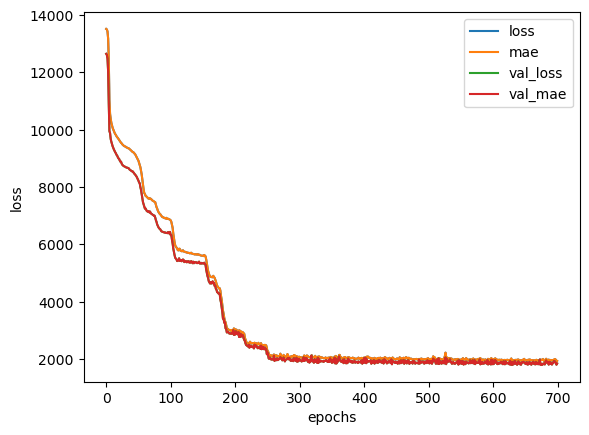

In [11]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");